<a href="https://colab.research.google.com/github/HanaeELMEKKI/INSE_6220_Project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#INSE_6220_Project

#Install Numpy version (Current Numpy version provided in Google Colab failed to execute Classification code)
#!pip uninstall numpy
#!pip install numpy==1.20.1
#!pip install numpy==1.21.6

# install pycaret
!pip install pycaret==2.3.6

#Check the installed version
from pycaret.utils import version
version()

#import librairies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 KB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 35.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.4 MB/s eta 0:00:00
     

For practicing the PCA algorithm and applying machine learning models, we selected the ”Abalone” dataset that was published by the Department of Computer Science, University of Tasmania in 1995. The dataset can be downloaded from the
”UCI Machine Learning Repository”. Originally, the dataset contained 4177 entries across 8 attributes. To avoid a long execution time, we limited the
number of entries to 500 lines in our study.

Initial dataset attributes are as follows:

1.   Sex
1.   Length
2.   Diameter
3.   Height
4.   Whole weight
5.   Shucked weight
6.   Viscera weight
7.   Shell weight

After testing the dataset, we observed that the ”Sex" column is weakly correlated with the other columns,so it has been left out of the final dataset. 

Originally, the column "Rings" served as the  value for classification problems. In this report, "Rings" is used as an attribute column, and a new column is added to represent classes, "Age".

As a result, our dataset contains the following eight attributes:

1.   Length
2.   Diameter
3.   Height
4.   Whole weight
5.   Shucked weight
6.   Viscera weight
7.   Shell weight
8.   Rings


https://archive.ics.uci.edu/ml/datasets/abalone

In [2]:
#read cvs file into dataframe -final-data
df = pd.read_csv('https://raw.githubusercontent.com/HanaeELMEKKI/INSE_6220_Project/main/Abalone-data.csv')
df.head(25)

Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0    0.605     0.475   0.180        0.9365          0.3940          0.2190   
1    0.680     0.560   0.165        1.6390          0.6055          0.2805   
2    0.665     0.525   0.165        1.3380          0.5515          0.3575   
3    0.680     0.550   0.175        1.7980          0.8150          0.3925   
4    0.705     0.550   0.200        1.7095          0.6330          0.4115   
5    0.540     0.475   0.155        1.2170          0.5305          0.3075   
6    0.595     0.495   0.185        1.2850          0.4160          0.2240   
7    0.595     0.475   0.170        1.2470          0.4800          0.2250   
8    0.570     0.480   0.175        1.1850          0.4740          0.2610   
9    0.600     0.475   0.150        1.0075          0.4425          0.2210   
10   0.615     0.475   0.170        1.1025          0.4695          0.2355   
11   0.620     0.510   0.175        1.6150          0.5105          0.1920   
12   0.595     0.475   0.160        1.3175          0.4080          0.2340   
13   0.695     0.560   0.190        1.4940          0.5880          0.3425   
14   0.665     0.535   0.195        1.6060          0.5755          0.3880   
15   0.700     0.535   0.160        1.7255          0.6300          0.2635   
16   0.710     0.540   0.165        1.9590          0.7665          0.2610   
17   0.595     0.480   0.165        1.2620          0.4835          0.2830   
18   0.650     0.520   0.190        1.3445          0.5190          0.3060   
19   0.590     0.475   0.145        1.0530          0.4415          0.2620   
20   0.645     0.485   0.215        1.5140          0.5460          0.2615   
21   0.605     0.485   0.160        1.2220          0.5300          0.2575   
22   0.610     0.485   0.175        1.2445          0.5440          0.2970   
23   0.725     0.560   0.210        2.1410          0.6500          0.3980   
24   0.650     0.545   0.230        1.7520          0.5605          0.2895   

    Shell Weight  Rings      Age  
0         0.2950     15  11-30.5  
1         0.4600     15  11-30.5  
2         0.3500     18  11-30.5  
3         0.4550     19  11-30.5  
4         0.4900     13  11-30.5  
5         0.3400     16  11-30.5  
6         0.4850     13  11-30.5  
7         0.4250     20  11-30.5  
8         0.3800     11  11-30.5  
9         0.2800     15  11-30.5  
10        0.3450     14  11-30.5  
11        0.6750     12  11-30.5  
12        0.5800     21  11-30.5  
13        0.4850     15  11-30.5  
14        0.4800     14  11-30.5  
15        0.5400     19  11-30.5  
16        0.7800     18  11-30.5  
17        0.4100     17  11-30.5  
18        0.4465     16  11-30.5  
19        0.3250     15  11-30.5  
20        0.6350     16  11-30.5  
21        0.2800     13  11-30.5  
22        0.3450     12  11-30.5  
23        1.0050     18  11-30.5  
24        0.8150     16  11-30.5

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          416 non-null    float64
 1   Diameter        416 non-null    float64
 2   Height          416 non-null    float64
 3   Whole Weight    416 non-null    float64
 4   Shucked Weight  416 non-null    float64
 5   Viscera Weight  416 non-null    float64
 6   Shell Weight    416 non-null    float64
 7   Rings           416 non-null    int64  
 8   Age             416 non-null    object 
dtypes: float64(7), int64(1), object(1)
memory usage: 29.4+ KB


In [4]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  1


In [5]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


Exploratory Data Analysis

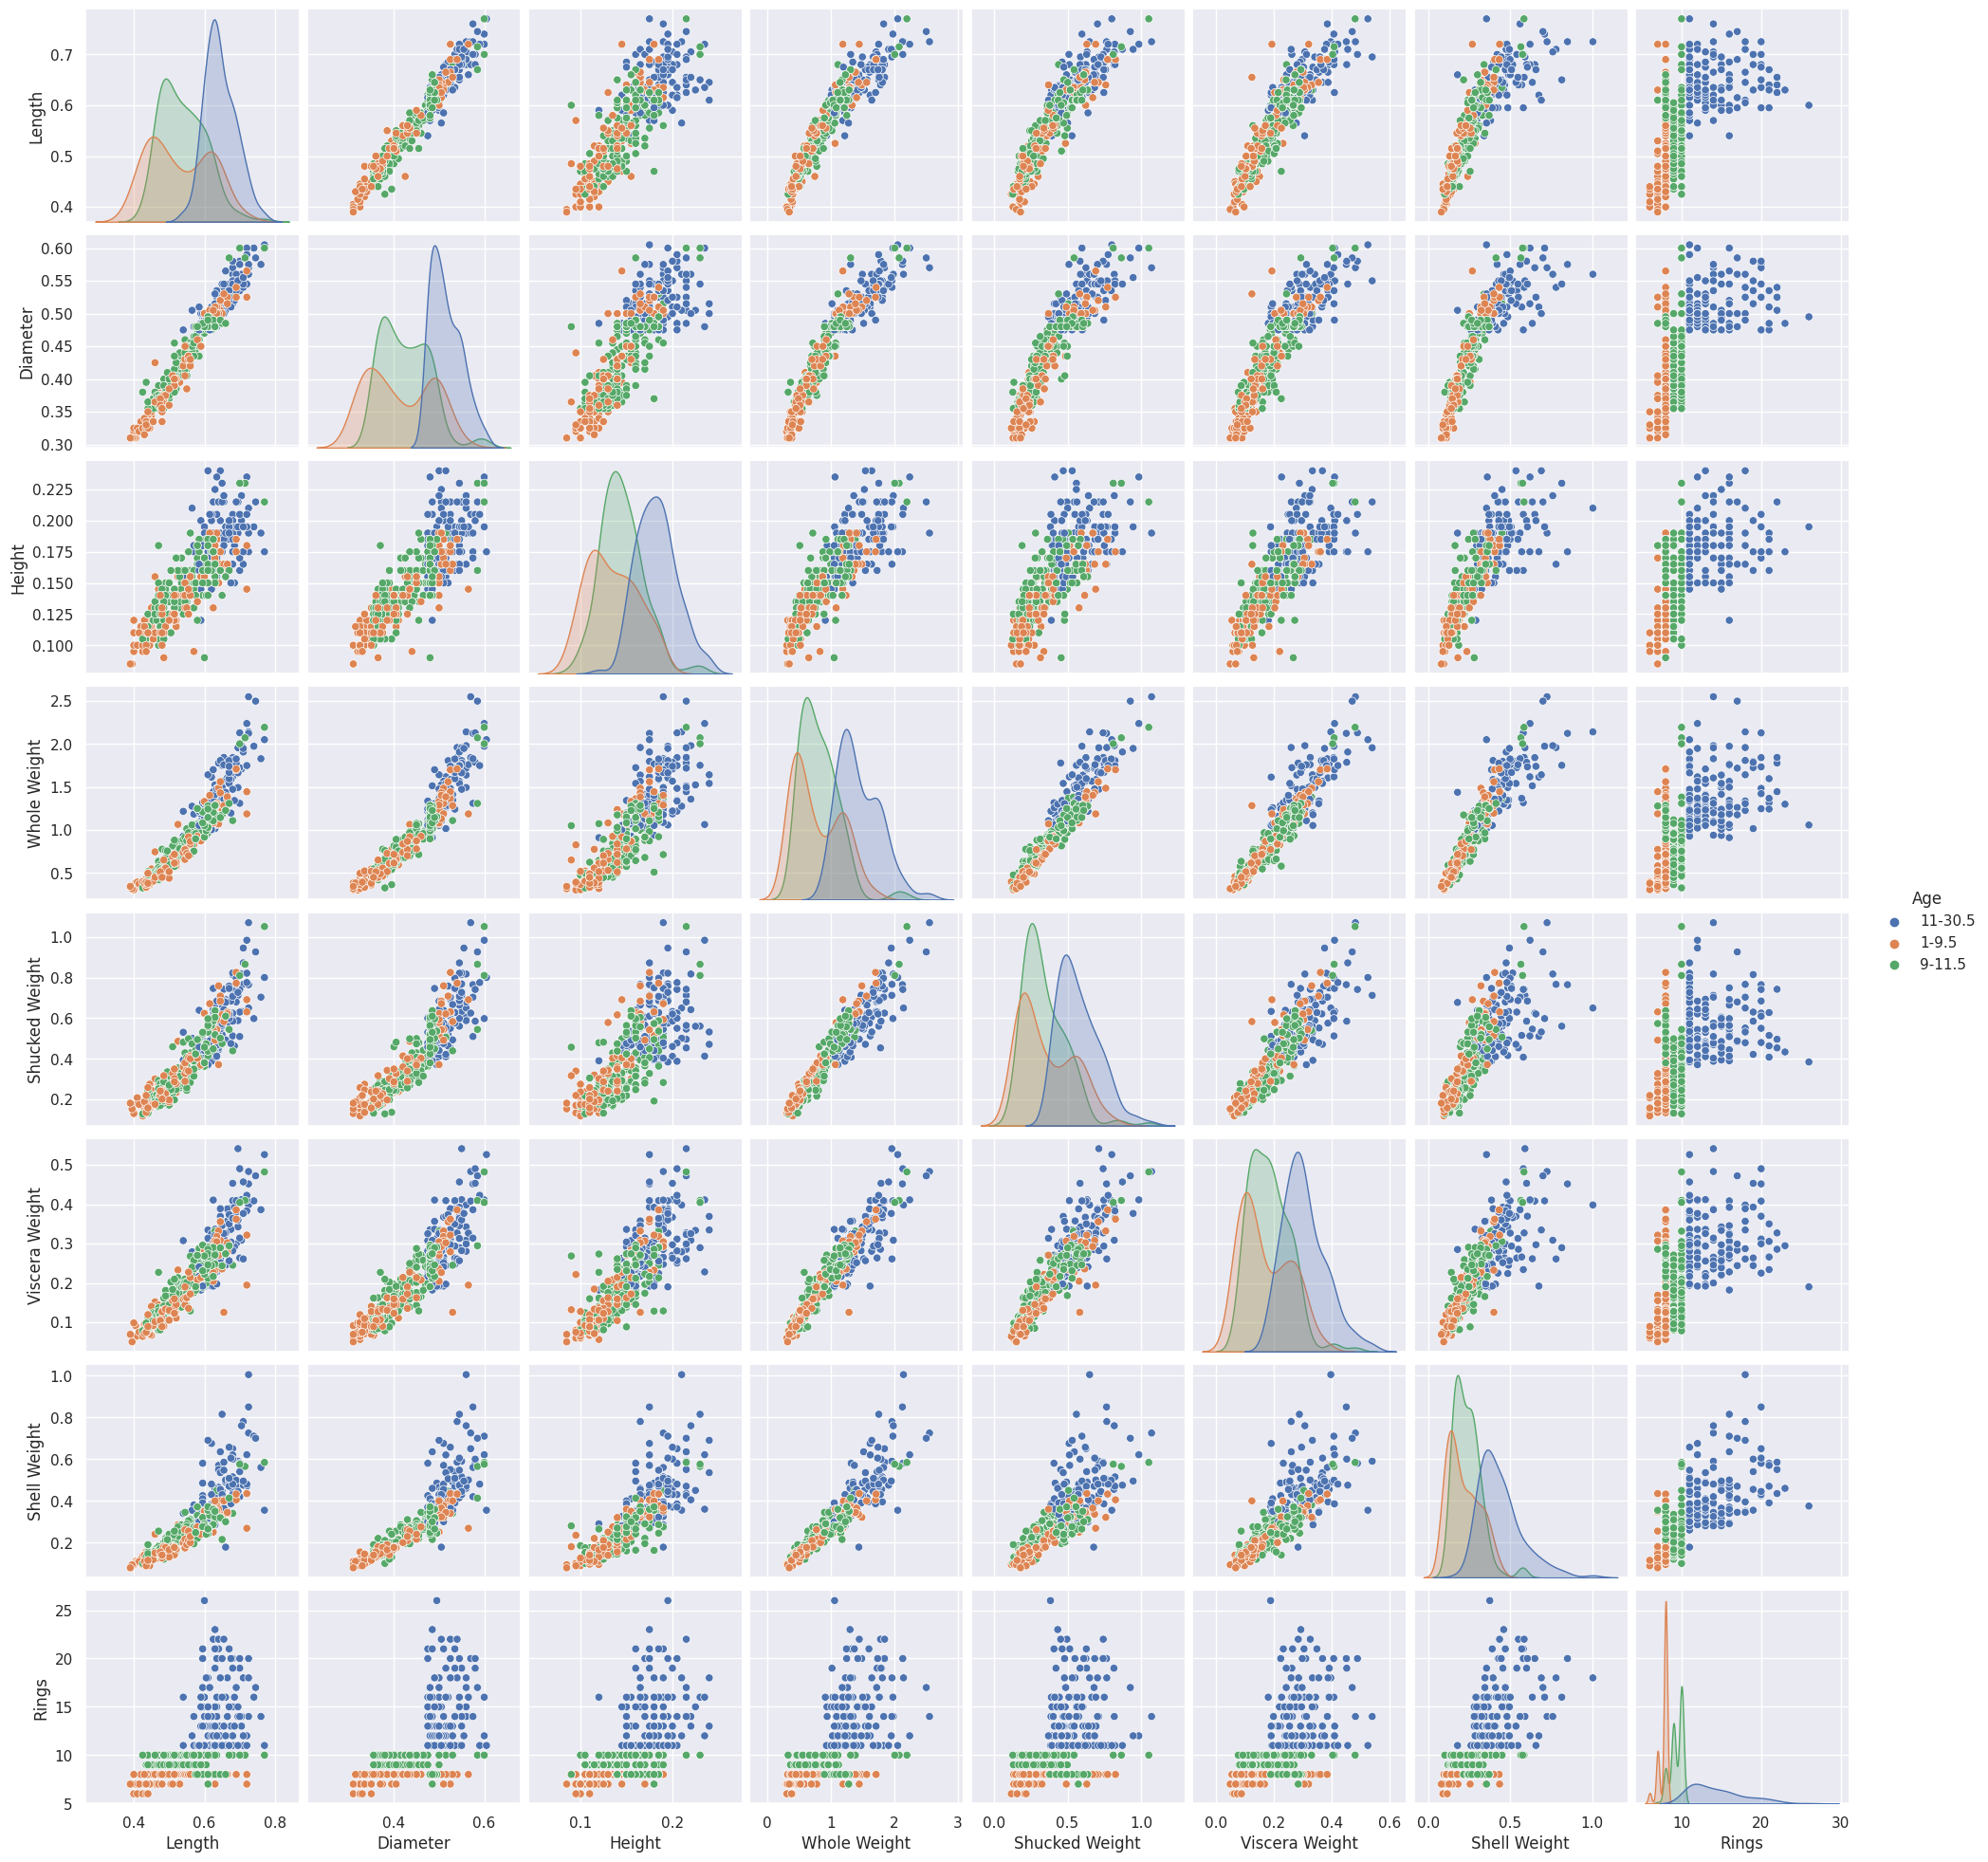

In [6]:
sns.pairplot(df, hue='Age')
plt.show()

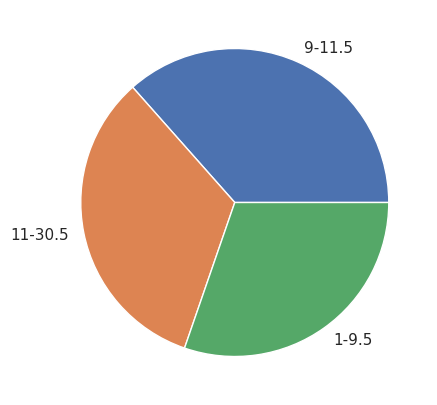

In [7]:
y =df['Age']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [8]:
X = df.drop(columns=['Age'])
X.head(10)

Length  Diameter  Height  Whole Weight  Shucked Weight  Viscera Weight  \
0   0.605     0.475   0.180        0.9365          0.3940          0.2190   
1   0.680     0.560   0.165        1.6390          0.6055          0.2805   
2   0.665     0.525   0.165        1.3380          0.5515          0.3575   
3   0.680     0.550   0.175        1.7980          0.8150          0.3925   
4   0.705     0.550   0.200        1.7095          0.6330          0.4115   
5   0.540     0.475   0.155        1.2170          0.5305          0.3075   
6   0.595     0.495   0.185        1.2850          0.4160          0.2240   
7   0.595     0.475   0.170        1.2470          0.4800          0.2250   
8   0.570     0.480   0.175        1.1850          0.4740          0.2610   
9   0.600     0.475   0.150        1.0075          0.4425          0.2210   

   Shell Weight  Rings  
0         0.295     15  
1         0.460     15  
2         0.350     18  
3         0.455     19  
4         0.490     13  
5         0.340     16  
6         0.485     13  
7         0.425     20  
8         0.380     11  
9         0.280     15

In [9]:
X.describe().transpose()

count       mean       std     min       25%       50%  \
Length          416.0   0.571238  0.084100  0.3900  0.500000   0.59000   
Diameter        416.0   0.451791  0.070476  0.3100  0.390000   0.47500   
Height          416.0   0.154387  0.031684  0.0850  0.130000   0.15500   
Whole Weight    416.0   1.012698  0.453799  0.3030  0.615375   1.01450   
Shucked Weight  416.0   0.424085  0.189246  0.1185  0.255750   0.41750   
Viscera Weight  416.0   0.221582  0.096539  0.0505  0.135500   0.22000   
Shell Weight    416.0   0.296606  0.145956  0.0790  0.176875   0.27825   
Rings           416.0  10.548077  3.476960  6.0000  8.000000  10.00000   

                      75%      max  
Length           0.630000   0.7700  
Diameter         0.500000   0.6050  
Height           0.175000   0.2400  
Whole Weight     1.279500   2.5500  
Shucked Weight   0.554125   1.0705  
Viscera Weight   0.286250   0.5410  
Shell Weight     0.365000   1.0050  
Rings           11.000000  26.0000

Standardize the Data

In [10]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length  Diameter    Height  Whole Weight  Shucked Weight  Viscera Weight  \
0  0.401933  0.329717  0.809352     -0.168114       -0.159166       -0.026775   
1  1.294799  1.537256  0.335363      1.381792        0.959773        0.611043   
2  1.116226  1.040034  0.335363      0.717704        0.674086        1.409612   
3  1.294799  1.395193  0.651356      1.732589        2.068130        1.772598   
4  1.592421  1.395193  1.441338      1.537334        1.105261        1.969648   
5 -0.371884  0.329717  0.019370      0.450745        0.562986        0.891061   
6  0.282884  0.613844  0.967348      0.600771       -0.042775        0.025080   
7  0.282884  0.329717  0.493359      0.516933        0.295816        0.035451   
8 -0.014738  0.400749  0.651356      0.380144        0.264073        0.408808   
9  0.342408  0.329717 -0.138627     -0.011469        0.097423       -0.006033   

   Shell Weight     Rings  
0     -0.011015  1.281949  
1      1.120821  1.281949  
2      0.366264  2.145810  
3      1.086522  2.433764  
4      1.326609  0.706041  
5      0.297667  1.569902  
6      1.292311  0.706041  
7      0.880734  2.721718  
8      0.572052  0.130133  
9     -0.113909  1.281949

In [11]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Length          416.0  6.661338e-16  1.001204 -2.157617 -0.848080  0.223360   
Diameter        416.0 -7.686159e-16  1.001204 -2.014330 -0.877822  0.329717   
Height          416.0  2.647455e-16  1.001204 -2.192580 -0.770612  0.019370   
Whole Weight    416.0 -2.903660e-16  1.001204 -1.565787 -0.876603  0.003975   
Shucked Weight  416.0  3.416071e-17  1.001204 -1.616696 -0.890577 -0.034840   
Viscera Weight  416.0  5.978124e-17  1.001204 -1.774293 -0.892756 -0.016404   
Shell Weight    416.0 -1.622634e-16  1.001204 -1.492690 -0.821306 -0.125913   
Rings           416.0 -1.708035e-16  1.001204 -1.309636 -0.733729 -0.157821   

                     75%       max  
Length          0.699555  2.366238  
Diameter        0.684876  2.176542  
Height          0.651356  2.705309  
Whole Weight    0.588637  3.391705  
Shucked Weight  0.687974  3.419851  
Viscera Weight  0.670676  3.312696  
Shell Weight    0.469158  4.859307  
Rings           0.130133  4.449441

Observations and variables

In [12]:
observations = list(df.index)
variables = list(df.columns)

Box and Whisker Plots

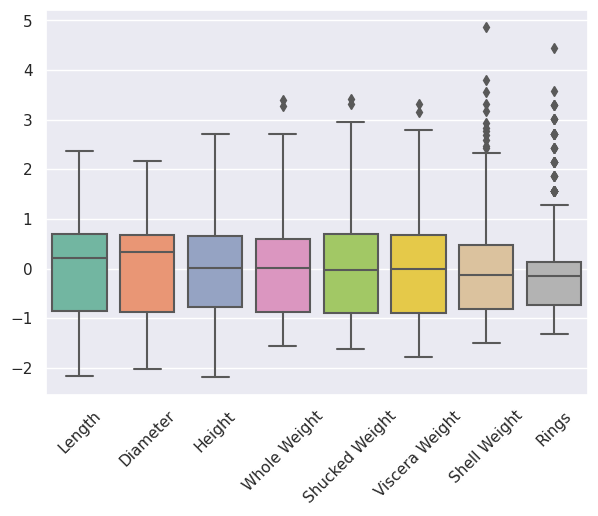

In [13]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


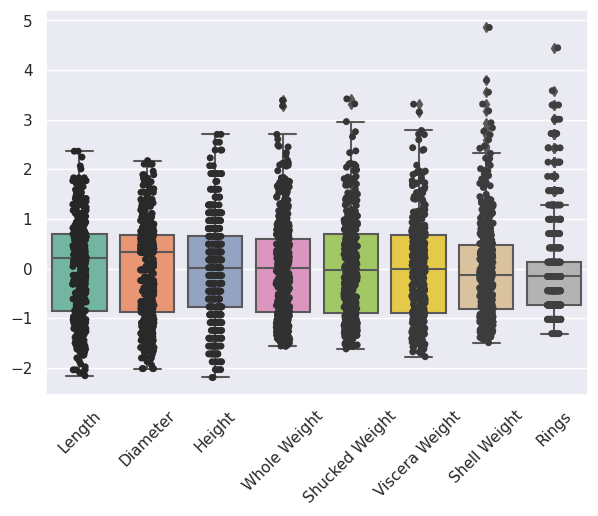

In [14]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

Correlation Matrix

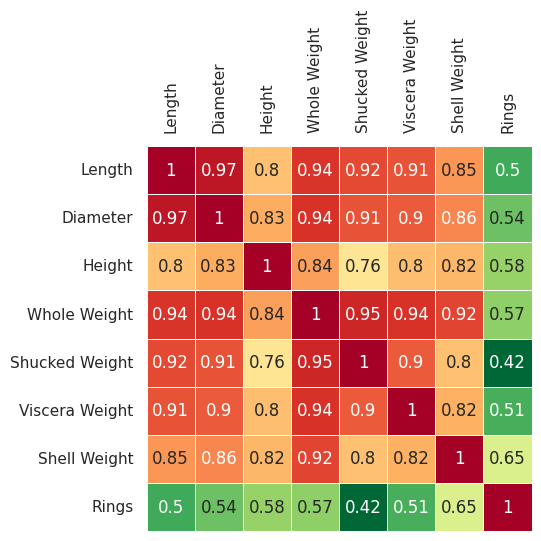

In [15]:
#plt.figure(figsize=(16, 16))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Principal Component Analysis (PCA)

Text(0, 0.5, 'Z2')

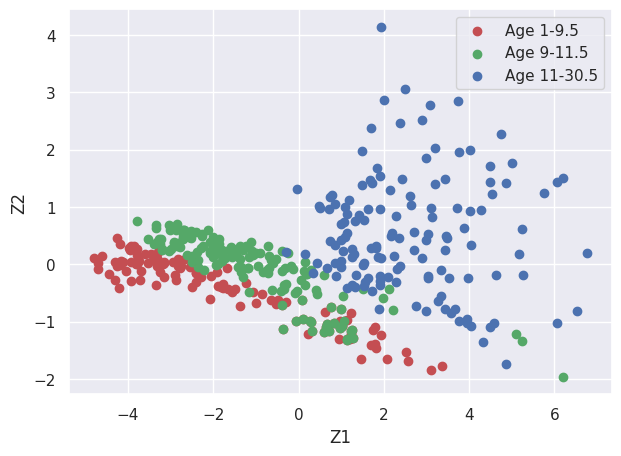

In [16]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(1-8 Rings)->1,  2(9-10 Rings)->2, 3(11-29 Rings)->3

idx_R1 = np.where(df['Age'] == '1-9.5')
idx_R2 = np.where(df['Age'] == '9-11.5')
idx_R3 = np.where(df['Age'] == '11-30.5')

plt. figure()
plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='Age 1-9.5')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='Age 9-11.5')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='Age 11-30.5')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

Eigenvectors

[[ 0.37259011 -0.18119061  0.14825882 -0.14331292  0.51404864  0.17350291
  -0.70060939  0.02499044]
 [ 0.37526033 -0.11996313  0.08588904 -0.12845681  0.55905081  0.09051775
   0.70700969 -0.01779005]
 [ 0.34432957  0.10520724 -0.89836686 -0.19001492 -0.02418804 -0.15432601
  -0.05169536 -0.0112212 ]
 [ 0.38291834 -0.08539577  0.1170721   0.18073651 -0.24147519 -0.1422649
   0.0313925   0.84863095]
 [ 0.36126481 -0.30887348  0.24946176 -0.06584617 -0.2338438  -0.70280372
  -0.02155643 -0.3980419 ]
 [ 0.36674187 -0.15502697  0.10221663 -0.33571868 -0.55573801  0.61035066
   0.06234441 -0.18180287]
 [ 0.36018002  0.16447739 -0.04937563  0.84678524 -0.02457604  0.19109834
  -0.01584197 -0.2938721 ]
 [ 0.24581596  0.88765354  0.2734157  -0.24515485 -0.01375565 -0.12111109
  -0.03199079 -0.03013529]]


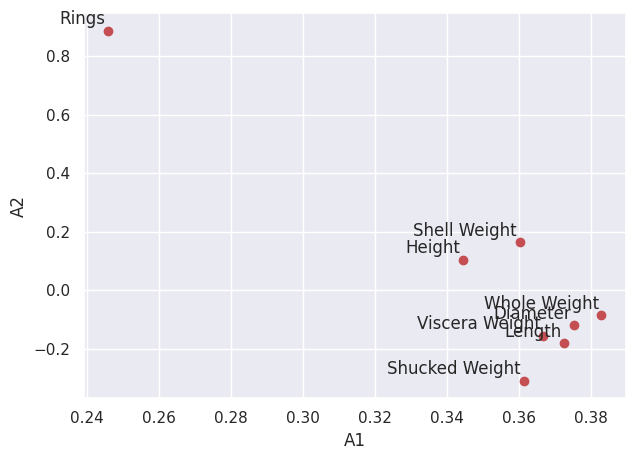

In [17]:
A = pca.components_.T 
print (A)
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


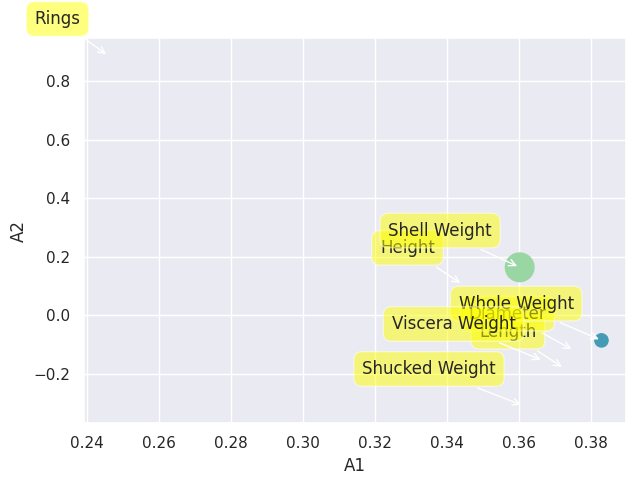

In [18]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree plot

[6.63170975 0.72589752 0.24774643 0.16421836 0.12623462 0.08724346
 0.02675813 0.00946884]


Text(0, 0.5, 'Explained variance')

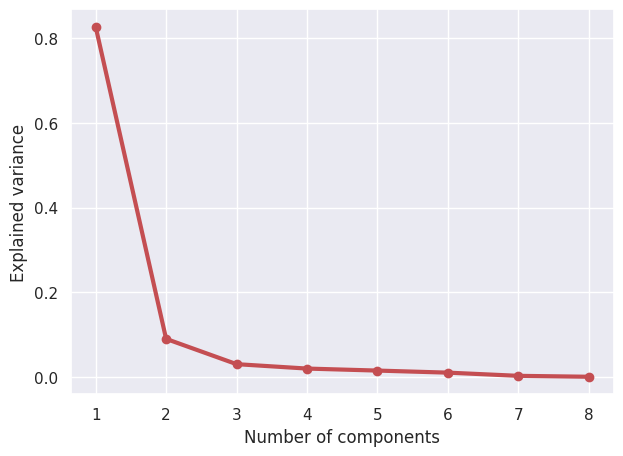

In [19]:
#Eigenvalues
Lambda = pca.explained_variance_ 
print(Lambda)
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

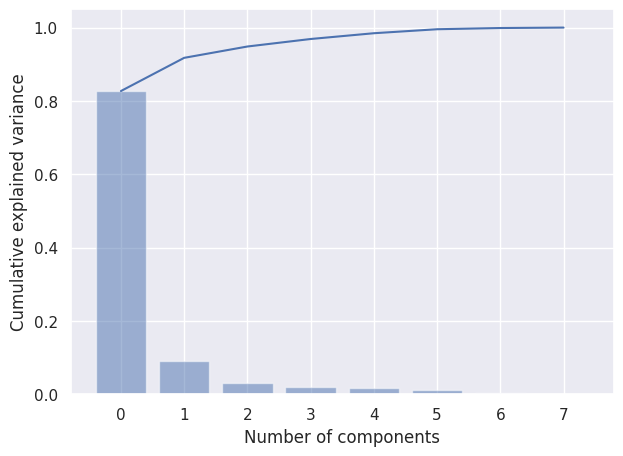

In [20]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

Biplot

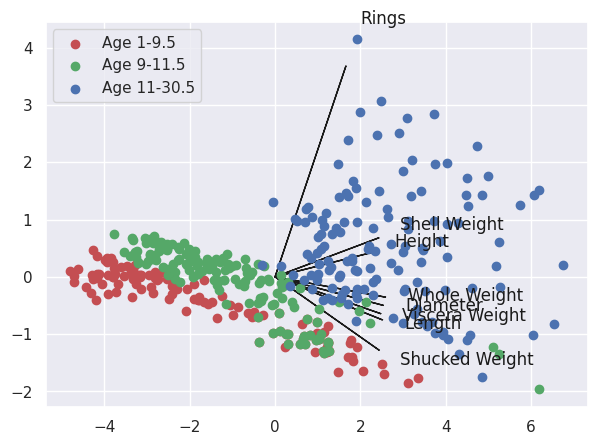

In [21]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('')
plt.ylabel('')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_R1,0], Z[idx_R1,1], c='r', label='Age 1-9.5')
plt.scatter(Z[idx_R2,0], Z[idx_R2,1], c='g', label='Age 9-11.5')
plt.scatter(Z[idx_R3,0], Z[idx_R3,1], c='b', label='Age 11-30.5')
plt.legend(loc='upper left')

### **Using PCA Library**

In [22]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from pca import pca
# Initialize and keep all PCs
model = pca(n_components= 0.90)
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [24]:
out['PC']

PC1       PC2
0    0.731631  1.176553
1    2.993537  0.429363
2    2.616358  1.185221
3    4.280541  0.944051
4    3.974868 -0.237364
..        ...       ...
411  0.982229 -1.091231
412  0.302458 -0.999355
413  0.990172 -0.786712
414  0.714229 -1.163958
415  1.141625 -1.322039

[416 rows x 2 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [94.83%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (9.05% expl.var)'>)

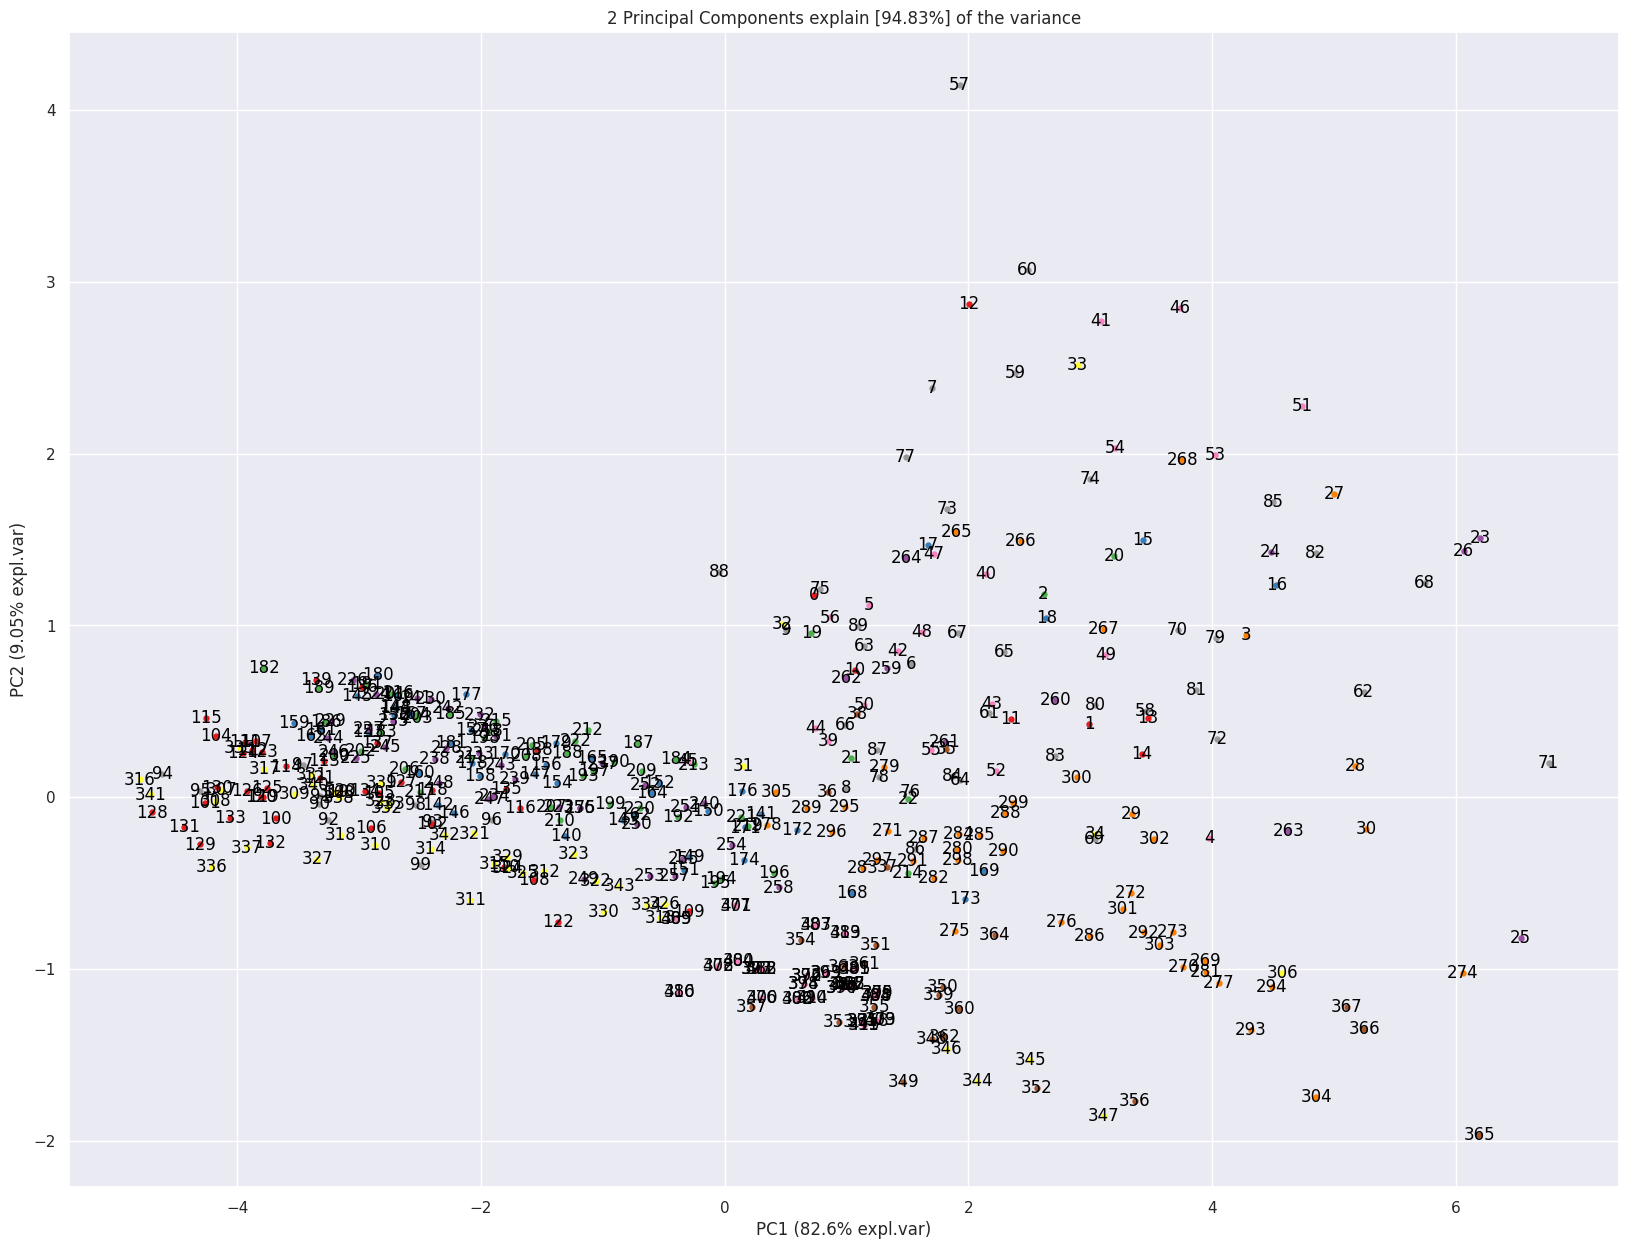

In [25]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [26]:
A = out['loadings'].T

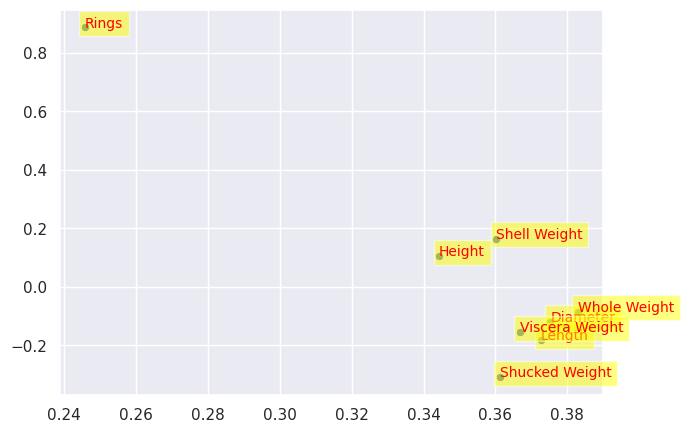

In [27]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i],y=A.PC2[i], s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

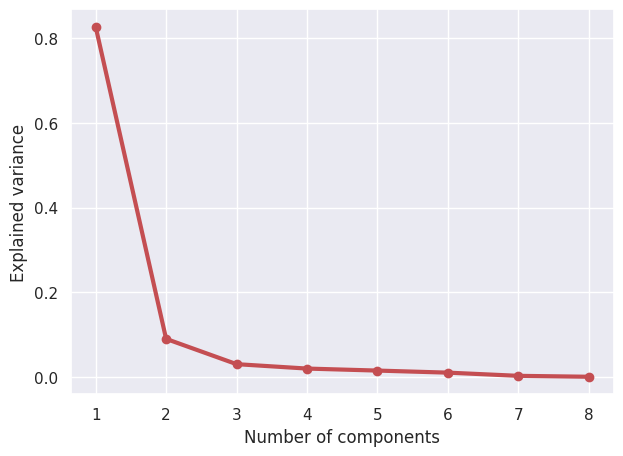

In [28]:

VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()
     

**Explained Variance Plot**

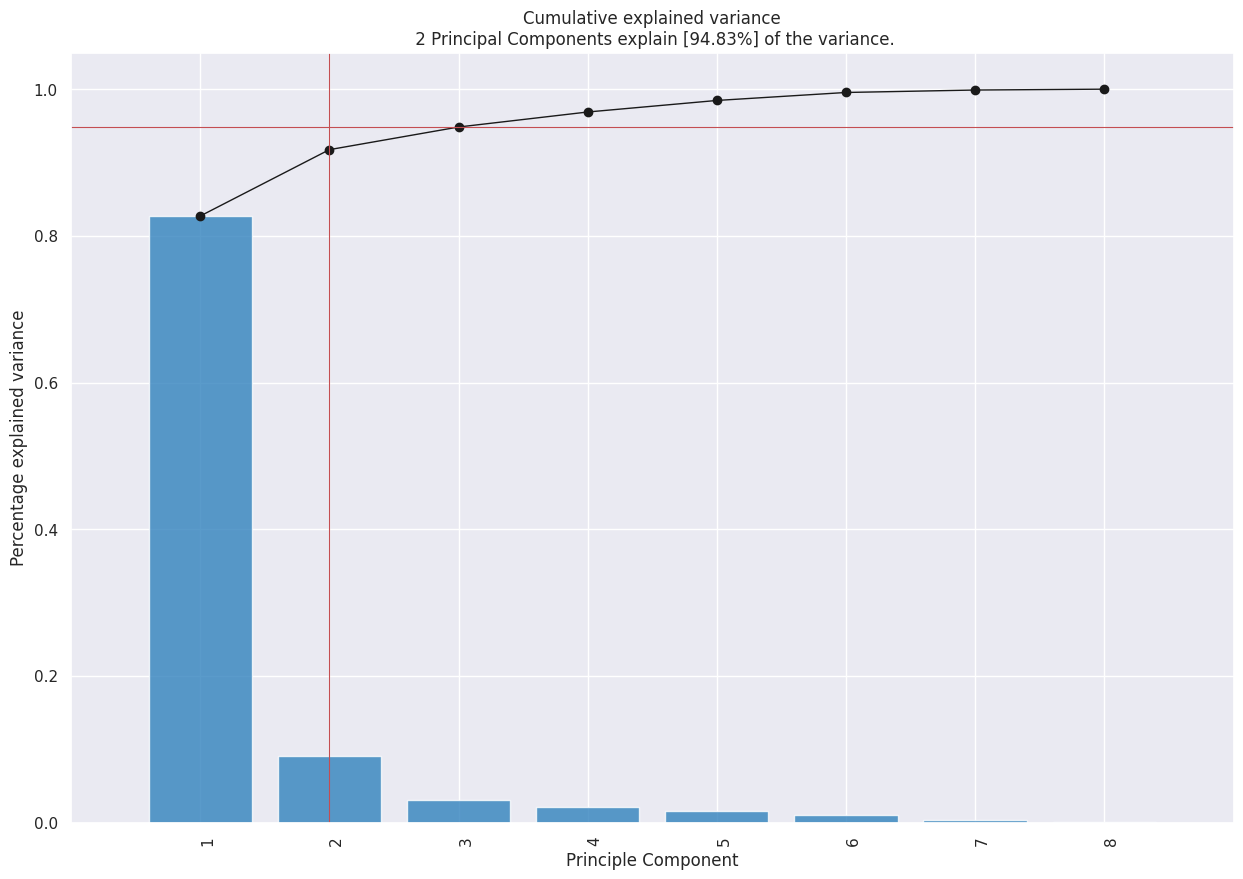

<Figure size 700x500 with 0 Axes>

In [29]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [416] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [94.83%] of the variance'}, xlabel='PC1 (82.6% expl.var)', ylabel='PC2 (9.05% expl.var)'>)

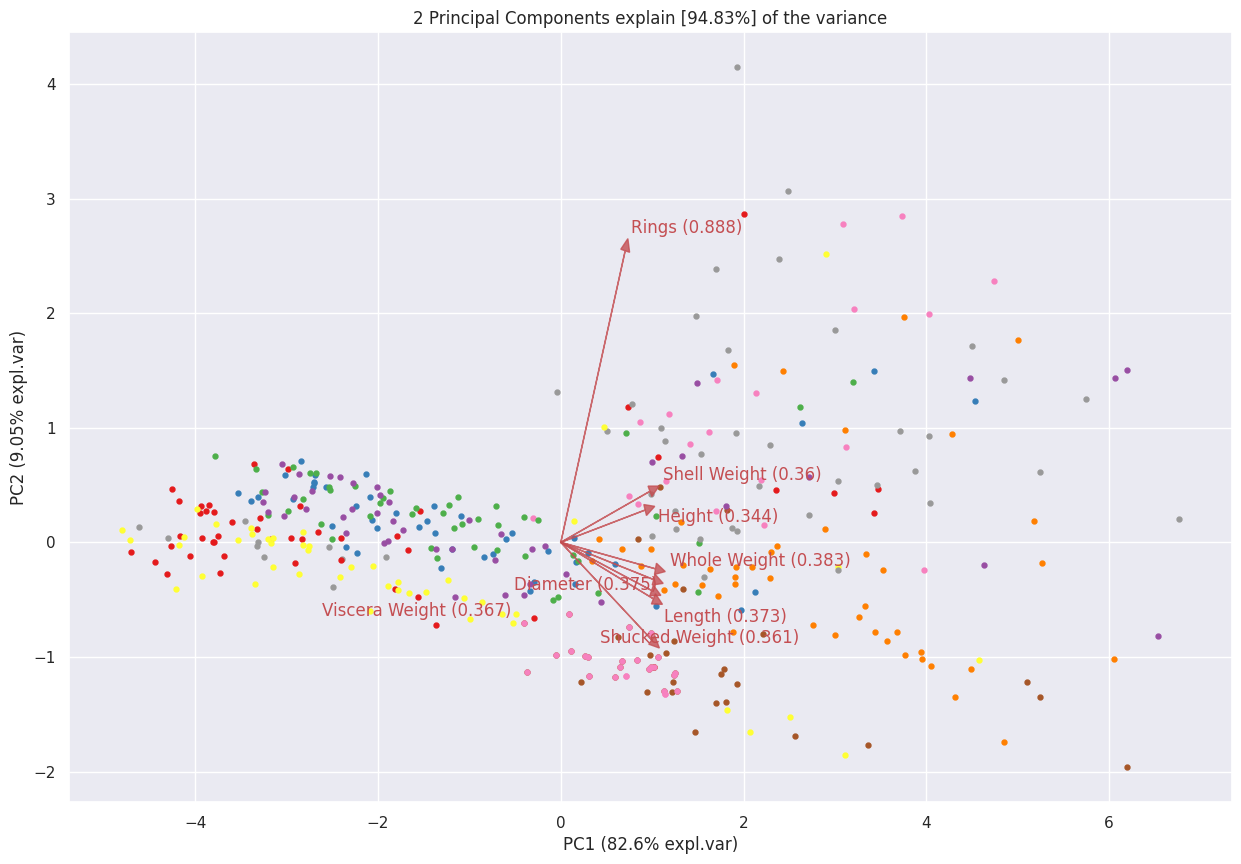

In [30]:
model.biplot(label=False, legend=False)

In [31]:

model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

# **Classification**

**Using PyCaret**

In [32]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [33]:

data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (374, 9)
Unseen Data For Predictions: (42, 9)


**Setting up the Environment in PyCaret**

In [34]:

from pycaret.classification import *
clf = setup(data=data, target='Age', train_size=0.7, session_id=123)

Description                            Value
0                               session_id                              123
1                                   Target                              Age
2                              Target Type                       Multiclass
3                            Label Encoded  1-9.5: 0, 11-30.5: 1, 9-11.5: 2
4                            Original Data                         (374, 9)
5                           Missing Values                            False
6                         Numeric Features                                7
7                     Categorical Features                                1
8                         Ordinal Features                            False
9                High Cardinality Features                            False
10                 High Cardinality Method                             None
11                   Transformed Train Set                        (261, 25)
12                    Transformed Test Set                        (113, 25)
13                      Shuffle Train-Test                             True
14                     Stratify Train-Test                            False
15                          Fold Generator                  StratifiedKFold
16                             Fold Number                               10
17                                CPU Jobs                               -1
18                                 Use GPU                            False
19                          Log Experiment                            False
20                         Experiment Name                 clf-default-name
21                                     USI                             a455
22                         Imputation Type                           simple
23          Iterative Imputation Iteration                             None
24                         Numeric Imputer                             mean
25      Iterative Imputation Numeric Model                             None
26                     Categorical Imputer                         constant
27  Iterative Imputation Categorical Model                             None
28           Unknown Categoricals Handling                   least_frequent
29                               Normalize                            False
30                        Normalize Method                             None
31                          Transformation                            False
32                   Transformation Method                             None
33                                     PCA                            False
34                              PCA Method                             None
35                          PCA Components                             None
36                     Ignore Low Variance                            False
37                     Combine Rare Levels                            False
38                    Rare Level Threshold                             None
39                         Numeric Binning                            False
40                         Remove Outliers                            False
41                      Outliers Threshold                             None
42                Remove Multicollinearity                            False
43             Multicollinearity Threshold                             None
44             Remove Perfect Collinearity                             True
45                              Clustering                            False
46                    Clustering Iteration                             None
47                     Polynomial Features                            False
48                       Polynomial Degree                             None
49                    Trignometry Features                            False
50                    Polynomial Threshold                             None
51                          Group Features                            False
52 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [35]:
 #show the best model and their statistics
#!pip install numpy==1.23.5
best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.9426  0.0000  0.9496  0.9551   
xgboost         Extreme Gradient Boosting    0.9425  0.9846  0.9449  0.9501   
lr                    Logistic Regression    0.9387  0.9846  0.9455  0.9512   
gbc          Gradient Boosting Classifier    0.9386  0.9899  0.9405  0.9459   
nb                            Naive Bayes    0.9349  0.9820  0.9418  0.9496   
et                 Extra Trees Classifier    0.9309  0.9582  0.9324  0.9383   
dt               Decision Tree Classifier    0.9271  0.9561  0.9293  0.9325   
svm                   SVM - Linear Kernel    0.9195  0.0000  0.9224  0.9330   
rf               Random Forest Classifier    0.9120  0.9827  0.9143  0.9211   
lightgbm  Light Gradient Boosting Machine    0.9117  0.9729  0.9120  0.9187   
knn                K Neighbors Classifier    0.8966  0.9864  0.8971  0.9072   
lda          Linear Discriminant Analysis    0.8890  0.9531  0.8967  0.8983   
ada                  Ada Boost Classifier    0.8735  0.9754  0.8576  0.8847   
dummy                    Dummy Classifier    0.3755  0.5000  0.3333  0.1412   
qda       Quadratic Discriminant Analysis    0.2873  0.0000  0.3333  0.0829   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.9428  0.9142  0.9202     0.009  
xgboost   0.9424  0.9136  0.9174     0.123  
lr        0.9389  0.9084  0.9144     0.291  
gbc       0.9386  0.9076  0.9112     0.478  
nb        0.9355  0.9027  0.9094     0.011  
et        0.9309  0.8959  0.8996     0.155  
dt        0.9272  0.8902  0.8928     0.012  
svm       0.9186  0.8790  0.8860     0.015  
rf        0.9106  0.8676  0.8729     0.176  
lightgbm  0.9097  0.8668  0.8713     0.168  
knn       0.8969  0.8441  0.8489     0.015  
lda       0.8883  0.8337  0.8387     0.022  
ada       0.8624  0.8054  0.8190     0.129  
dummy     0.2052  0.0000  0.0000     0.012  
qda       0.1286  0.0000  0.0000     0.015

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:compare_models() succesfully completed......................................


In [36]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=123, solver='auto',
                tol=0.001)

**Create a Model**

In Pycaret, the "create_model" function trains and evaluates models. This function outputs a score grid that displays Accuracy, AUC, Recall, Precision, F1, Kappa and MCC. By default, Pycaret has 10 folds, so the score grids include 10 rows.

Pycaret offers several classification models. In this notebook, we run the following classifiers:

*   K Neighbors Classifier ('knn')
*   Random Forest Classifier ('rf')
*   Extra Trees Classifier ('et')

**Create K Neighbors Classifier**

In [37]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9856  0.8833  0.8903  0.8878  0.8320  0.8337
1       0.8462  0.9843  0.8487  0.8675  0.8516  0.7694  0.7746
2       0.8846  0.9801  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.8077  0.9502  0.8011  0.8182  0.8111  0.7079  0.7095
4       0.9615  1.0000  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9231  1.0000  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.8846  0.9890  0.8796  0.8868  0.8838  0.8263  0.8281
7       0.9615  1.0000  0.9583  0.9654  0.9613  0.9421  0.9442
8       0.8462  0.9750  0.8417  0.8526  0.8422  0.7658  0.7729
9       0.9615  1.0000  0.9583  0.9650  0.9612  0.9417  0.9438
Mean    0.8966  0.9864  0.8971  0.9072  0.8969  0.8441  0.8489
SD      0.0517  0.0149  0.0537  0.0496  0.0510  0.0783  0.0778

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


In [38]:
#trained model object is stored in the variable 'knn'. 
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune K Neighbors Model**

In [39]:
tuned_knn = tune_model(knn,custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9259  0.9917  0.9333  0.9407  0.9259  0.8893  0.8967
1       0.9615  0.9829  0.9667  0.9663  0.9618  0.9421  0.9442
2       0.8846  0.9712  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.8846  0.9598  0.8857  0.8900  0.8854  0.8263  0.8281
4       0.9615  1.0000  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9615  0.9976  0.9667  0.9663  0.9618  0.9421  0.9442
6       0.9615  0.9956  0.9630  0.9658  0.9615  0.9424  0.9444
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.8846  0.9773  0.8917  0.8889  0.8850  0.8267  0.8285
9       0.9615  1.0000  0.9583  0.9650  0.9612  0.9417  0.9438
Mean    0.9387  0.9876  0.9432  0.9469  0.9389  0.9081  0.9120
SD      0.0391  0.0135  0.0366  0.0347  0.0390  0.0585  0.0562

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [40]:
#tuned model object is stored in the variable 'tuned_knn'. 
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform')

**Evaluate K Neighbors Model**

Update statmodels

In [41]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=19, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [43]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9939  0.9000  0.9074  0.8842  0.8344  0.8465
1       0.9231  0.9869  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8846  0.9819  0.8857  0.8900  0.8854  0.8263  0.8281
3       0.8846  0.9361  0.8857  0.8900  0.8854  0.8263  0.8281
4       0.9615  0.9931  0.9667  0.9654  0.9615  0.9418  0.9439
5       0.9231  0.9952  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.8846  0.9759  0.8750  0.9024  0.8762  0.8255  0.8389
7       0.9231  0.9956  0.9213  0.9269  0.9228  0.8842  0.8862
8       0.8846  0.9844  0.8833  0.8834  0.8819  0.8259  0.8277
9       0.9615  0.9837  0.9583  0.9650  0.9612  0.9417  0.9438
Mean    0.9120  0.9827  0.9143  0.9211  0.9106  0.8676  0.8729
SD      0.0297  0.0167  0.0313  0.0292  0.0310  0.0446  0.0435

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [44]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9630  0.9704  0.9667  0.9671  0.9631  0.9444  0.9464
1       0.8846  0.9643  0.9000  0.9056  0.8803  0.8278  0.8408
2       0.8846  0.9889  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.8846  0.9106  0.8714  0.8955  0.8820  0.8231  0.8289
4       0.9615  0.9671  0.9667  0.9654  0.9615  0.9418  0.9439
5       0.9231  0.9976  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.8462  0.8953  0.8333  0.8788  0.8298  0.7668  0.7904
7       0.9231  0.9786  0.9167  0.9308  0.9196  0.8839  0.8899
8       0.8462  0.9300  0.8333  0.8728  0.8404  0.7647  0.7811
9       0.9231  0.9562  0.9250  0.9274  0.9229  0.8839  0.8859
Mean    0.9040  0.9559  0.9046  0.9203  0.9008  0.8550  0.8646
SD      0.0396  0.0318  0.0452  0.0310  0.0432  0.0604  0.0544

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [45]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Extra Trees Model**

In [46]:
et = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9630  0.9526  0.9667  0.9671  0.9631  0.9444  0.9464
1       0.9231  0.9508  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8846  0.9867  0.8857  0.8900  0.8854  0.8263  0.8281
3       0.8462  0.8985  0.8381  0.8462  0.8462  0.7668  0.7668
4       0.9615  1.0000  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9231  0.9486  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.9231  0.9443  0.9167  0.9371  0.9214  0.8839  0.8920
7       0.9615  0.9597  0.9583  0.9654  0.9613  0.9421  0.9442
8       0.9615  0.9889  0.9667  0.9658  0.9617  0.9422  0.9443
9       0.9615  0.9519  0.9583  0.9650  0.9612  0.9417  0.9438
Mean    0.9309  0.9582  0.9324  0.9383  0.9309  0.8959  0.8996
SD      0.0378  0.0273  0.0402  0.0383  0.0377  0.0572  0.0575

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 7
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Extra Trees Model**

In [47]:
tuned_et = tune_model(et)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8889  0.9917  0.9000  0.9074  0.8842  0.8344  0.8465
1       0.9231  0.9937  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8846  0.9749  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.9231  0.9595  0.9333  0.9317  0.9211  0.8844  0.8904
4       0.9615  0.9956  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9231  0.9952  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.9231  0.9824  0.9213  0.9269  0.9230  0.8844  0.8864
7       0.9615  1.0000  0.9583  0.9654  0.9613  0.9421  0.9442
8       0.8846  0.9798  0.8917  0.8974  0.8849  0.8274  0.8330
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9274  0.9873  0.9338  0.9395  0.9268  0.8913  0.8976
SD      0.0358  0.0123  0.0321  0.0291  0.0363  0.0533  0.0496

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 8
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Extra Trees Model**

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

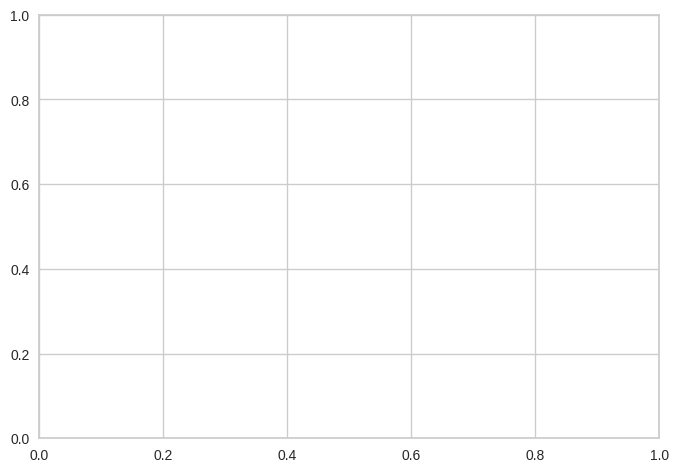

In [48]:
evaluate_model(tuned_et)

**Create Support Vector Machine Model**

In [49]:
svm = create_model('svm')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9259  0.0  0.9333  0.9407  0.9259  0.8893  0.8967
1       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8077  0.0  0.8048  0.8136  0.8090  0.7105  0.7121
3       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
4       0.9231  0.0  0.9190  0.9231  0.9231  0.8834  0.8834
5       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.8462  0.0  0.8333  0.8935  0.8345  0.7668  0.7962
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.0  0.9333  0.9385  0.9231  0.8850  0.8929
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9195  0.0  0.9224  0.9330  0.9186  0.8790  0.8860
SD      0.0556  0.0  0.0587  0.0501  0.0570  0.0840  0.0804

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 9
INFO:logs:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Support Vector Machine Model**

In [50]:
tuned_svm = tune_model(svm)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9259  0.0  0.9333  0.9407  0.9259  0.8893  0.8967
1       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8846  0.0  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
4       0.9615  0.0  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.9615  0.0  0.9630  0.9658  0.9615  0.9424  0.9444
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.0  0.9333  0.9385  0.9231  0.8850  0.8929
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9426  0.0  0.9496  0.9551  0.9428  0.9142  0.9202
SD      0.0353  0.0  0.0306  0.0259  0.0352  0.0526  0.0480

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 10
INFO:logs:SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Support Vector Machine Model**

In [51]:
evaluate_model(tuned_svm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=SGDClassifier(alpha=1e-07, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.7700000001, learning_rate='adaptive', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=123, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Tune the Best Model**

In [52]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9259  0.0  0.9333  0.9407  0.9259  0.8893  0.8967
1       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
2       0.8846  0.0  0.9000  0.9192  0.8846  0.8286  0.8453
3       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
4       0.9615  0.0  0.9667  0.9663  0.9618  0.9421  0.9442
5       0.9231  0.0  0.9333  0.9402  0.9236  0.8850  0.8929
6       0.9615  0.0  0.9630  0.9658  0.9615  0.9424  0.9444
7       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9231  0.0  0.9333  0.9385  0.9231  0.8850  0.8929
9       1.0000  0.0  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9426  0.0  0.9496  0.9551  0.9428  0.9142  0.9202
SD      0.0353  0.0  0.0306  0.0259  0.0352  0.0526  0.0480

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 11
INFO:logs:RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)
INFO:logs:tune_model() succesfully completed......................................


In [53]:
tuned_best_model

RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [54]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RidgeClassifier(alpha=2.81, class_weight=None, copy_X=True, fit_intercept=False,
                max_iter=None, normalize=True, random_state=123, solver='auto',
                tol=0.001), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [55]:
clf_pca = setup(data=data, target='Age', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 2)

Description                            Value
0                               session_id                              123
1                                   Target                              Age
2                              Target Type                       Multiclass
3                            Label Encoded  1-9.5: 0, 11-30.5: 1, 9-11.5: 2
4                            Original Data                         (374, 9)
5                           Missing Values                            False
6                         Numeric Features                                7
7                     Categorical Features                                1
8                         Ordinal Features                            False
9                High Cardinality Features                            False
10                 High Cardinality Method                             None
11                   Transformed Train Set                         (261, 2)
12                    Transformed Test Set                         (113, 2)
13                      Shuffle Train-Test                             True
14                     Stratify Train-Test                            False
15                          Fold Generator                  StratifiedKFold
16                             Fold Number                               10
17                                CPU Jobs                               -1
18                                 Use GPU                            False
19                          Log Experiment                            False
20                         Experiment Name                 clf-default-name
21                                     USI                             cc93
22                         Imputation Type                           simple
23          Iterative Imputation Iteration                             None
24                         Numeric Imputer                             mean
25      Iterative Imputation Numeric Model                             None
26                     Categorical Imputer                         constant
27  Iterative Imputation Categorical Model                             None
28           Unknown Categoricals Handling                   least_frequent
29                               Normalize                             True
30                        Normalize Method                           zscore
31                          Transformation                            False
32                   Transformation Method                             None
33                                     PCA                             True
34                              PCA Method                           linear
35                          PCA Components                                2
36                     Ignore Low Variance                            False
37                     Combine Rare Levels                            False
38                    Rare Level Threshold                             None
39                         Numeric Binning                            False
40                         Remove Outliers                            False
41                      Outliers Threshold                             None
42                Remove Multicollinearity                            False
43             Multicollinearity Threshold                             None
44             Remove Perfect Collinearity                             True
45                              Clustering                            False
46                    Clustering Iteration                             None
47                     Polynomial Features                            False
48                       Polynomial Degree                             None
49                    Trignometry Features                            False
50                    Polynomial Threshold                             None
51                          Group Features                            False
52 

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Age',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                ('dummy', Dummify(target='Age')),
                ('fix_perfect', Remove_100(target='Age')),
                ('clean_names', Clean_Colum_Names()),
           

In [56]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
knn                K Neighbors Classifier    0.7739  0.8958  0.7690  0.7823   
rf               Random Forest Classifier    0.7584  0.8851  0.7561  0.7818   
lr                    Logistic Regression    0.7546  0.8961  0.7538  0.7700   
ridge                    Ridge Classifier    0.7509  0.0000  0.7481  0.7561   
qda       Quadratic Discriminant Analysis    0.7507  0.9041  0.7527  0.7659   
lda          Linear Discriminant Analysis    0.7507  0.8941  0.7496  0.7650   
lightgbm  Light Gradient Boosting Machine    0.7395  0.8902  0.7352  0.7487   
nb                            Naive Bayes    0.7393  0.8922  0.7335  0.7581   
et                 Extra Trees Classifier    0.7315  0.8541  0.7282  0.7504   
gbc          Gradient Boosting Classifier    0.7281  0.8896  0.7208  0.7374   
xgboost         Extreme Gradient Boosting    0.7165  0.8696  0.7099  0.7314   
dt               Decision Tree Classifier    0.6819  0.7654  0.6817  0.7141   
ada                  Ada Boost Classifier    0.6516  0.8325  0.6452  0.6586   
svm                   SVM - Linear Kernel    0.6053  0.0000  0.5955  0.5726   
dummy                    Dummy Classifier    0.3755  0.5000  0.3333  0.1412   

              F1   Kappa     MCC  TT (Sec)  
knn       0.7664  0.6575  0.6662     0.018  
rf        0.7567  0.6350  0.6458     0.195  
lr        0.7527  0.6297  0.6371     0.016  
ridge     0.7381  0.6236  0.6353     0.009  
qda       0.7479  0.6248  0.6328     0.017  
lda       0.7476  0.6231  0.6318     0.016  
lightgbm  0.7331  0.6054  0.6148     0.042  
nb        0.7331  0.6052  0.6169     0.012  
et        0.7286  0.5941  0.6032     0.161  
gbc       0.7226  0.5873  0.5954     0.379  
xgboost   0.7158  0.5702  0.5760     0.076  
dt        0.6796  0.5198  0.5328     0.010  
ada       0.6425  0.4706  0.4804     0.118  
svm       0.5625  0.3988  0.4225     0.014  
dummy     0.2052  0.0000  0.0000     0.010

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 2
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:compare_models() succesfully completed......................................


In [57]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

**Tune the Best Model**

In [58]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8148  0.8894  0.8176  0.8370  0.8189  0.7234  0.7293
1       0.8077  0.9033  0.8048  0.8067  0.8020  0.7079  0.7127
2       0.7308  0.9115  0.7201  0.7308  0.7308  0.5919  0.5919
3       0.7308  0.9150  0.6915  0.8077  0.7043  0.5777  0.6163
4       0.8462  0.9216  0.8487  0.8515  0.8470  0.7684  0.7701
5       0.8846  0.9433  0.8857  0.8900  0.8854  0.8263  0.8281
6       0.6154  0.8497  0.6019  0.6258  0.5823  0.4157  0.4371
7       0.7308  0.8577  0.7222  0.7402  0.7213  0.5928  0.6024
8       0.7692  0.9088  0.7750  0.7810  0.7697  0.6549  0.6592
9       0.7308  0.8858  0.7333  0.7350  0.7314  0.5956  0.5969
Mean    0.7661  0.8986  0.7601  0.7806  0.7593  0.6455  0.6544
SD      0.0723  0.0272  0.0791  0.0719  0.0815  0.1111  0.1054

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 3
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


In [59]:
tuned_best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [60]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Explainable AI with Shapley values**
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [61]:
!pip install shap
print("Numpy version: ", np.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Numpy version:  1.22.4


In [62]:
!pip install numba==0.53
     
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [63]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8148  0.9041  0.8130  0.8181  0.8148  0.7216  0.7231
1       0.8462  0.9153  0.8667  0.8772  0.8356  0.7709  0.7919
2       0.6923  0.8736  0.6937  0.7405  0.7016  0.5367  0.5453
3       0.6154  0.8167  0.5735  0.6186  0.5980  0.4023  0.4218
4       0.8077  0.9177  0.8116  0.8243  0.8109  0.7118  0.7165
5       0.8462  0.9046  0.8487  0.8675  0.8516  0.7694  0.7746
6       0.7308  0.8484  0.7222  0.7808  0.7239  0.5919  0.6102
7       0.6538  0.8394  0.6481  0.6527  0.6520  0.4788  0.4799
8       0.7692  0.9109  0.7750  0.8304  0.7710  0.6564  0.6854
9       0.8077  0.9203  0.8083  0.8077  0.8077  0.7098  0.7098
Mean    0.7584  0.8851  0.7561  0.7818  0.7567  0.6350  0.6458
SD      0.0775  0.0359  0.0896  0.0822  0.0804  0.1208  0.1199

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [64]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8148  0.9185  0.8213  0.8444  0.8162  0.7239  0.7344
1       0.7692  0.9015  0.7857  0.8237  0.7550  0.6571  0.6860
2       0.6923  0.8949  0.7222  0.8013  0.6968  0.5517  0.6001
3       0.8077  0.9207  0.8011  0.8118  0.8078  0.7065  0.7082
4       0.7692  0.9315  0.7783  0.7853  0.7703  0.6549  0.6607
5       0.8462  0.9575  0.8487  0.8558  0.8489  0.7679  0.7696
6       0.6923  0.8832  0.6852  0.7077  0.6839  0.5347  0.5459
7       0.7692  0.8538  0.7639  0.7774  0.7659  0.6518  0.6577
8       0.7692  0.9342  0.7833  0.8205  0.7654  0.6579  0.6819
9       0.9231  0.9583  0.9250  0.9231  0.9231  0.8839  0.8839
Mean    0.7853  0.9154  0.7915  0.8151  0.7833  0.6790  0.6928
SD      0.0651  0.0311  0.0626  0.0532  0.0667  0.0959  0.0877

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


# **SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


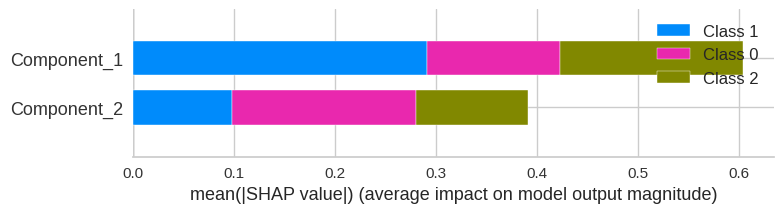

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [65]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [66]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


**Visualize many predictions**

In [67]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0002,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=130, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
